*Day 2*
## Excercise: Model Building
---

1. Gunakan data titanic dari seaborn
2. Lakukan EDA untuk mendapatkan apakah ada anomalies di data tersebut, ditanggulangi
3. Tentukan kolom mana saja yang akan dipakai, tentukan x & y
4. Buatlah model dengan menggunakan:
    - Logistic Regression
    - Decision Tree
    - KNN 
    - Support Vector Classifier (SVC)
5. Dengan menggunakan accuracy_score sebagai metricsnya, tentukan model mana yang paling baik untuk memprediksi korban selamat

---

## 1. Import Library & Dataset

In [1]:
## EDA Standard Libary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats as ss

In [114]:
#ML Library

#ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#ML TrainTest Split
from sklearn.model_selection import train_test_split
#ML Report
from sklearn.metrics import  accuracy_score

In [55]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
#Load Dataset

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2. EDA (Anomaly Findings & Cleaning)

In [7]:
#Deep info
#Construct deep Info on columns & values:

titanicInfo = []
for i in titanic.columns:
    titanicInfo.append([i, titanic[i].dtypes,
                      titanic[i].isna().sum(),
                      round((((titanic[i].isna().sum())/(len(titanic)))*100),2), 
                    titanic[i].nunique(), 
                    titanic[i].sample(3).values])
pd.DataFrame(titanicInfo, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique','uniqueSample'])


,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,survived,int64,0,0.00,2,"[0, 0, 0]"
1,pclass,int64,0,0.00,3,"[3, 3, 2]"
2,sex,object,0,0.00,2,"[male, female, male]"
3,age,float64,177,19.87,88,"[nan, 14.0, 24.0]"
4,sibsp,int64,0,0.00,7,"[1, 0, 0]"
5,parch,int64,0,0.00,7,"[0, 0, 0]"
6,fare,float64,0,0.00,248,"[29.7, 47.1, 7.25]"
7,embarked,object,2,0.22,3,"[C, S, S]"
8,class,category,0,0.00,3,"['Third', 'Third', 'First'] Categories (3, obj..."
9,who,object,0,0.00,3,"[man, woman, man]"


- Find missing values on [age, embarked, deck, embark town] columns
- Will drop Deck Columns as it contains 77% Null Data
- Possible feature selection x on age, sex, class, alone

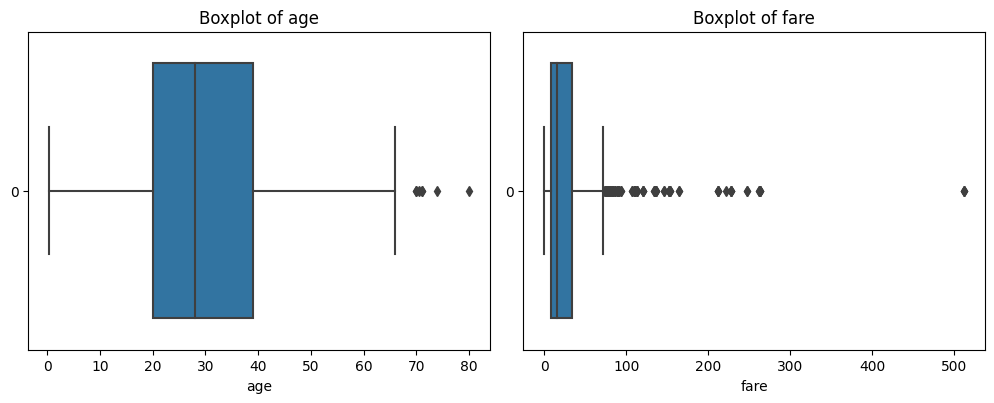

In [52]:
#Check for anomalies with data distribution on numerical cols
numerical_cols = titanic[['age', 'fare']]

#Plotting boxplot for numerical values 
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=titanic[column], orient='horizontal')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

## 2.1 Check and Cleaning Duplicate Values

In [13]:
#Check Duplicates
titanic[titanic.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


Found **107 Rows** with duplicate Values

In [14]:
#Drop duplicate
titanic.drop_duplicates(inplace=True)

Dropped **107 Rows** of duplicates

## 2.2 Cleaning Null Values

In [15]:
#Check for Null Values
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

Found Null in ['age', 'embarked', 'deck', 'embark_town]

In [27]:
#Null percentage in deck
titanic['deck'].isna().sum()/len(titanic)*100

74.23469387755102

In [28]:
#Drop deck columns
titanic.drop(columns='deck', axis=1, inplace=True)

Deck columns dropped

In [48]:
#Drop Rows containing nulls
nullEmbarkedIndex = titanic[titanic['embarked'].isna()].index

In [50]:
#Drop row by Index
titanic.drop(nullEmbarkedIndex, inplace=True)

Dropped 2 rows 

## 2.3 Insert Missing value on age with median

<Axes: ylabel='Density'>

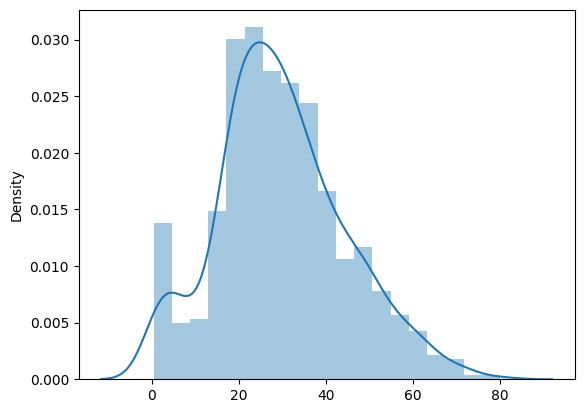

In [56]:
#Check age distribution
sns.distplot( x=titanic['age'])

As the distribution of age is not normally distributed, the average age = median

In [59]:
#Replace missing values on age with median
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [60]:
#Check missing value on age
titanic['age'].isna().sum()

0

## 2.4 Reset Index

In [66]:
#Reset Index
titanic.reset_index(inplace=True)

In [67]:
#Drop old index cols
titanic.drop(columns='index', inplace=True)

# 3. Define Columns in used and Variables

To build ML model, columns which more likely to **predicts the outcome of survival is selected as independent variable** and **survival state as target variable**

In [68]:
#Check  columns
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


- target y = survived
- ind. variable x = sex, age, alone

In [69]:
#Drop Unused column
titanic = titanic.drop(columns=['fare' ,'pclass','sibsp','parch','embarked','class','who','embark_town','alive','adult_male'])
titanic

,survived,sex,age,alone
0,0,male,22.0,False
1,1,female,38.0,False
2,1,female,26.0,True
3,1,female,35.0,False
4,0,male,35.0,True
...,...,...,...,...
777,0,female,39.0,False
778,1,female,19.0,True
779,0,female,28.0,False
780,1,male,26.0,True


## 3.1 Converting categorical variable to Dummy Variable with OHE

In [72]:
#Convert sex & alone col to dummy var, save to a variable

titanicML =  pd.get_dummies(titanic, columns=['sex','alone'], dtype=int, drop_first=True)
titanicML

,survived,age,sex_male,alone_True
0,0,22.0,1,0
1,1,38.0,0,0
2,1,26.0,0,1
3,1,35.0,0,0
4,0,35.0,1,1
...,...,...,...,...
777,0,39.0,0,0
778,1,19.0,0,1
779,0,28.0,0,0
780,1,26.0,1,1


## 3.2 Train & Test Split Data

In [118]:
#Train test split
x = titanicML.drop('survived', axis=1)  # All cols except default as ind var (x)
y = titanicML['survived']               # default col as target (y)

xtrain, xtest, ytrain, ytest = train_test_split(
    x,
    y,
    test_size= 0.2,    # Jumlah size untuk test data, size training akan ngikut,
    random_state=20,   # Random seed
    stratify=y         # Proporsi antar train & test dari y yg diambil disamakan
)

- Splitted data with 20% proportion for testing and 80% for training

# 4. Building ML Models

## 4.1 Logistic Regression 

In [105]:
#Build model

logreg = LogisticRegression()
logreg.fit(xtrain,ytrain) #apply model to training data (xtrain,ytrain)

LogisticRegression()

In [106]:
#Print report
pred_logreg = logreg.predict(xtest)
print(f'Logistic Regression Accuracy Score: {round(accuracy_score(ytest,pred_logreg)*100,2)} %')

Logistic Regression Accuracy Score: 78.98 %


## 4.2 Decision Tree


In [107]:
#Build model

dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain) #apply model to training data (xtrain,ytrain)

DecisionTreeClassifier()

In [108]:
#Print report
pred_dt = dt.predict(xtest)
print(f'Decision Tree Accuracy Score: {round(accuracy_score(ytest,pred_dt)*100,2)} %')

Decision Tree Accuracy Score: 73.89 %


## 4.3 KNN 

In [109]:
#Build model

knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain) #apply model to training data (xtrain,ytrain)

KNeighborsClassifier()

In [110]:
#Print report
pred_knn = knn.predict(xtest)
print(f'KNN Accuracy Score: {round(accuracy_score(ytest,pred_knn)*100,2)} %')

KNN Accuracy Score: 74.52 %


## 4.4 Support Vector Classifier (SVC)

In [120]:
#Build model SVC

SVC_model = SVC()
SVC_model.fit(xtrain,ytrain) #apply model to training data (xtrain,ytrain)

SVC()

In [122]:
#Print report
pred_SVC = SVC_model.predict(xtest)
print(f'SVC Accuracy Score: {round(accuracy_score(ytest,pred_SVC)*100,2)} %')

SVC Accuracy Score: 59.24 %


# 5. Conclusion

In [125]:
#Print Accuracy testing output
print(f'Logistic Regression Accuracy Score: {round(accuracy_score(ytest,pred_logreg)*100,2)} %')
print(f'Decision Tree Accuracy Score: {round(accuracy_score(ytest,pred_dt)*100,2)} %')
print(f'KNN Accuracy Score: {round(accuracy_score(ytest,pred_knn)*100,2)} %')
print(f'SVC Accuracy Score: {round(accuracy_score(ytest,pred_SVC)*100,2)} %')

Logistic Regression Accuracy Score: 78.98 %
Decision Tree Accuracy Score: 73.89 %
KNN Accuracy Score: 74.52 %
SVC Accuracy Score: 59.24 %


From several ML Models applied to predict the survival (y) in titanic dataset using 3 independent variable (x): age, sex, alone; 

can be concluded that: 
- **Logistic Regression** are the **most** suited model with the highest Accuracy Score of **78.98 %**
- **SVC** are the **least** suited model with lowest Accuracy Score of **59.24 %**